In [ ]:
# Import Important Libraries
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
import math
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading the CSV/dropping null values and used values method 
df = pd.read_csv('winequality-combined.csv')
df1 = df.dropna()
df2 = df1.values


In [ ]:
# Separating Dataset into Features and Target Variables
# X: (First 12 Columns)
# y: (Column 13)
# a-g and j

X = df1[['fixed acidity','volatile acidity','citric acid',
'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']].values
y = df2[:, 12]




In [ ]:
#Splitting the data into train/test (80%/20%)
x_scale = preprocessing.scale(X)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.20, train_size=0.80)


In [ ]:
#Performing PCA, with 85% explained variance 
pca = PCA(0.85)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

print("Number of components:",pca.n_components_)
print("Explained variance:",pca.explained_variance_ratio_)

Number of components: 5
Explained variance: [0.36576556 0.17701347 0.13655146 0.09916155 0.07254957]


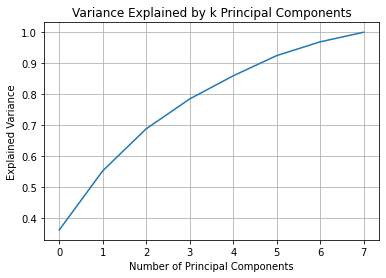

In [ ]:
#Plotting cumulative explained variance with untransformed data
pca_init = PCA().fit(x_train)
plt.plot(np.cumsum(pca_init.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance') #for each component
plt.title('Variance Explained by k Principal Components')
plt.grid()

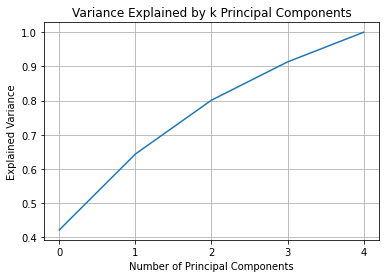

In [ ]:
#Plotting cumulative explained variance with transformed data
pca_transform = PCA().fit(x_train_pca)

plt.plot(np.cumsum(pca_transform.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance') #for each component
plt.title('Variance Explained by k Principal Components')
plt.xticks(range(5))
plt.grid()


In [ ]:
print(x_train.shape)
print(x_train_pca.shape)
#print(pca_x_train)

(5197, 8)
(5197, 5)


In [ ]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
acc_train_ridge = []
acc_test_ridge = []
for c in cVals:
    # Creating Logistic Regression model object with 'l2' regularization
    logreg_l2 = linear_model.LogisticRegression(C = c)

    # Fitting model on training set
    logreg_l2.fit(x_train_pca,y_train)

    # Finding prediction on training set
    yhat_train_l2 = logreg_l2.predict(x_train_pca)

    # Finding training accuracy
    acc_train_l2 = accuracy_score(y_train, yhat_train_l2)
    acc_train_ridge.append(acc_train_l2)
    print("Accuracy on train data with ridge = %f" % acc_train_l2)

print('')

for c in cVals:
    logreg_l2 = linear_model.LogisticRegression(C = c)
    logreg_l2.fit(x_train_pca,y_train)
    # Finding prediction on testing set
    yhat_test_l2 = logreg_l2.predict(x_test_pca)

    # Finding testing accuracy
    acc_test_l2 = accuracy_score(y_test, yhat_test_l2)
    acc_test_ridge.append(acc_test_l2)
    prec, recall ,fscore,_ = precision_recall_fscore_support(y_test,yhat_test_l2,average='binary')
    print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)
    print("Accuracy on test data with ridge = %f" % acc_test_l2)

Accuracy on train data with ridge = 0.760631
Accuracy on train data with ridge = 0.956898
Accuracy on train data with ridge = 0.974601
Accuracy on train data with ridge = 0.977487
Accuracy on train data with ridge = 0.978257
Accuracy on train data with ridge = 0.978257
Accuracy on train data with ridge = 0.978257

Precision: 0.7551963048498845 
Recall: 0.9989816700610998 
Fscore: 0.8601490574309514
Accuracy on test data with ridge = 0.754615
Precision: 0.7030812324929971 
Recall: 0.7668024439918534 
Fscore: 0.7335606429615196
Accuracy on test data with ridge = 0.579231
Precision: 0.6697819314641744 
Recall: 0.6568228105906314 
Fscore: 0.6632390745501286
Accuracy on test data with ridge = 0.496154
Precision: 0.663135593220339 
Recall: 0.6374745417515275 
Fscore: 0.6500519210799586
Accuracy on test data with ridge = 0.481538
Precision: 0.662778366914104 
Recall: 0.6364562118126272 
Fscore: 0.6493506493506493
Accuracy on test data with ridge = 0.480769
Precision: 0.662778366914104 
Recall

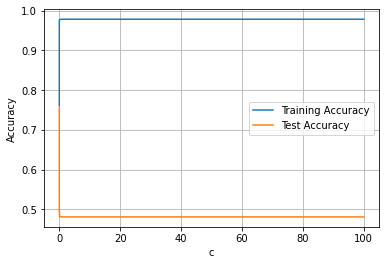

In [ ]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_ridge, cVals, acc_test_ridge)
plt.grid()
plt.xlabel('c')
plt.ylabel('Accuracy')

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='right')

In [ ]:
#Using a linear kernel 
from sklearn import svm
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

acc_train_svm_linear = []
acc_test_svm_linear = []

#train
print("Train Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train_pca, y_train)

    yhat_svc_linear_train = svc_linear.predict(x_train_pca)
    acc_train_linear = np.mean(yhat_svc_linear_train == y_train)
    acc_train_svm_linear.append(acc_train_linear)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_linear)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

print()

#test
print("Test Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train_pca, y_train)
    yhat_svc_linear_test = svc_linear.predict(x_test_pca)
    acc_test_linear = np.mean(yhat_svc_linear_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test_linear)
    prec, recall ,fscore,_ = precision_recall_fscore_support(y_test,yhat_svc_linear_test,average='binary')
    print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)
    print("Test Accuracy(c=" + str(c) + "):", acc_test_linear)
    #print('Test Accuracy = {0:f}'.format(acc_test_linear))
    



Train Accuracy using a Linear kernel
Train Accuracy(c=0.0001): 0.820473350009621
Train Accuracy(c=0.001): 0.9751779873003656
Train Accuracy(c=0.01): 0.9757552434096595
Train Accuracy(c=0.1): 0.9782566865499327
Train Accuracy(c=1): 0.9782566865499327
Train Accuracy(c=10): 0.9778718491437368
Train Accuracy(c=100): 0.9778718491437368

Test Accuracy using a Linear kernel
Precision: 0.750392464678179 
Recall: 0.9735234215885947 
Fscore: 0.8475177304964541
Test Accuracy(c=0.0001): 0.7353846153846154
Precision: 0.6690946930280958 
Recall: 0.654786150712831 
Fscore: 0.6618630983015955
Test Accuracy(c=0.001): 0.4946153846153846
Precision: 0.6620616365568545 
Recall: 0.6344195519348269 
Fscore: 0.6479459178367135
Test Accuracy(c=0.01): 0.47923076923076924
Precision: 0.6620616365568545 
Recall: 0.6344195519348269 
Fscore: 0.6479459178367135
Test Accuracy(c=0.1): 0.47923076923076924
Precision: 0.6606189967982924 
Recall: 0.630346232179226 
Fscore: 0.645127670661803
Test Accuracy(c=1): 0.4761538461

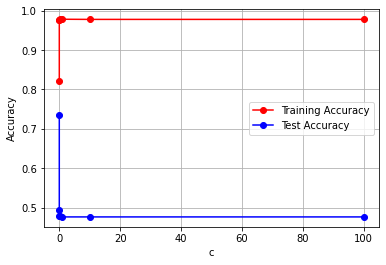

In [ ]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_svm_linear, 'ro-')
plt.plot(cVals, acc_test_svm_linear, 'bo-')

plt.grid()

plt.xlabel('c')
plt.ylabel('Accuracy')

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='right')